In [1]:
import torch
import torch.optim as optim
from matplotlib import pyplot as plt

In [2]:
t_c= [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u= [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c= torch.tensor(t_c)
t_u= torch.tensor(t_u)

In [3]:
#non linear model
def nonlinmodel(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

#linear model
def linmodel(t_u, w1, b):
    return w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs= (t_p-t_c)**2
    return squared_diffs.mean()

In [5]:
#loop for non linear model
def training_loop_nonlin(n_epochs, optimizer, params, t_u, t_c, lossVals):
    lossV = []
    epochV = []
    for epoch in range(1, n_epochs + 1):
        t_p = nonlinmodel(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 500 == 0:
            epochV.append(epoch)
            lossV.append(float(loss))
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    lossVals.append(epochV)
    lossVals.append(lossV)
    
    return params, lossVals

#loop for linear model
def training_loop_lin(n_epochs, optimizer, params, t_u, t_c, lossVals):
    lossV = []
    epochV = []
    for epoch in range(1, n_epochs + 1):
        t_p = linmodel(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 500 == 0:
            epochV.append(epoch)
            lossV.append(float(loss))
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    lossVals.append(epochV)
    lossVals.append(lossV)
    
    return params, lossVals

In [6]:
learning_rate = 1e-2

#needed to lower t_u value to make SGD with learning rate of 0.01
#stop producing 'nan' loss values
t_un= 0.01 * t_u

#SGD optimizer
#setting parameters and calling non linear loop
lossValsnonlin = []
paramsnonlin = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizernonlin = optim.SGD([paramsnonlin], lr=learning_rate)

training_loop_nonlin(n_epochs= 5000,
              optimizer = optimizernonlin,
              params = paramsnonlin,
              t_u = t_un,
              t_c= t_c,
              lossVals = lossValsnonlin)

Epoch 500, Loss 26.266182
Epoch 1000, Loss 12.949668
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


(tensor([ 24.3412,  27.9050, -10.3017], requires_grad=True),
 [[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
  [26.26618194580078,
   12.949667930603027,
   6.968258380889893,
   4.28157377243042,
   3.074786901473999,
   2.5327401161193848,
   2.2892637252807617,
   2.179900884628296,
   2.1307780742645264,
   2.108712911605835]])

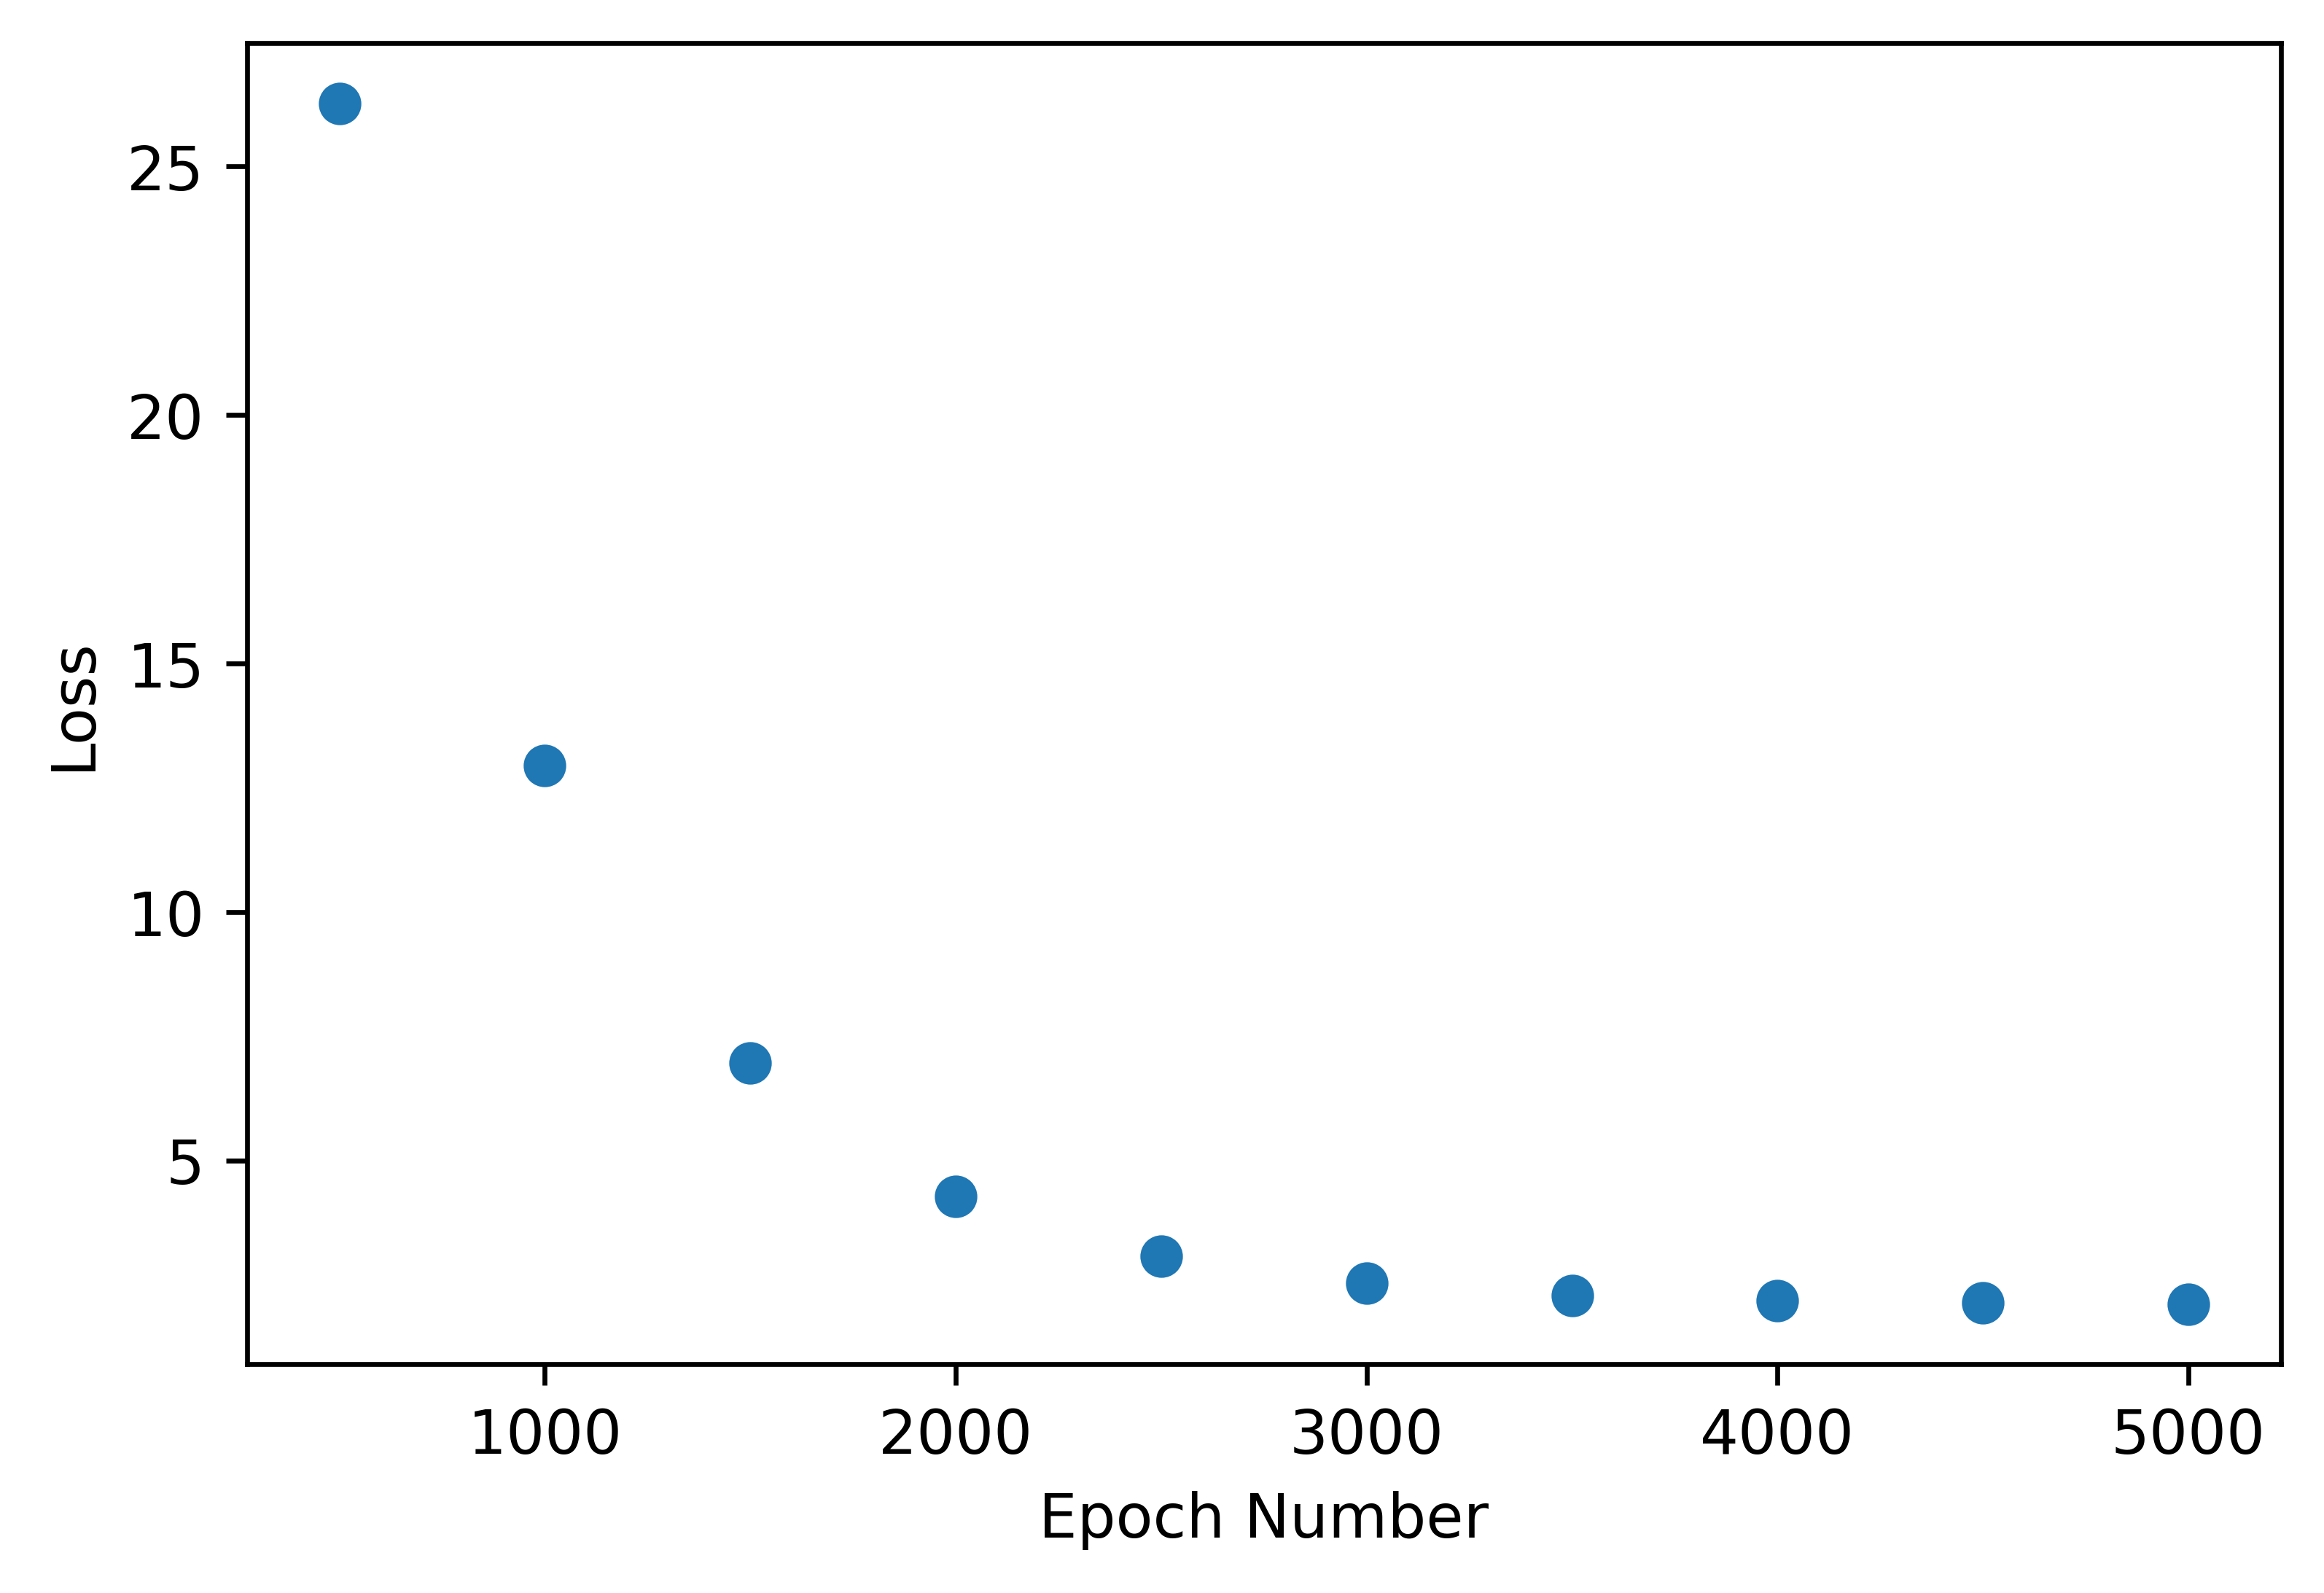

In [7]:
#plot linear model output
fig = plt.figure(dpi=600)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(lossValsnonlin[0], lossValsnonlin[1], 'o')

In [8]:
#set parameters and call linear model loop
paramslin = torch.tensor([1.0, 0.0], requires_grad=True)
optimizerlin = optim.SGD([paramslin], lr=learning_rate)
lossValslin = []

training_loop_lin(n_epochs= 5000,
              optimizer = optimizerlin,
              params = paramslin,
              t_u = t_un,
              t_c= t_c,
              lossVals = lossValslin)

Epoch 500, Loss 43.268955
Epoch 1000, Loss 29.849016
Epoch 1500, Loss 20.893354
Epoch 2000, Loss 14.916854
Epoch 2500, Loss 10.928510
Epoch 3000, Loss 8.266933
Epoch 3500, Loss 6.490756
Epoch 4000, Loss 5.305433
Epoch 4500, Loss 4.514429
Epoch 5000, Loss 3.986567


(tensor([ 47.2819, -13.9237], requires_grad=True),
 [[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
  [43.26895523071289,
   29.849016189575195,
   20.893354415893555,
   14.916853904724121,
   10.928509712219238,
   8.26693344116211,
   6.490756034851074,
   5.30543327331543,
   4.514429092407227,
   3.9865667819976807]])

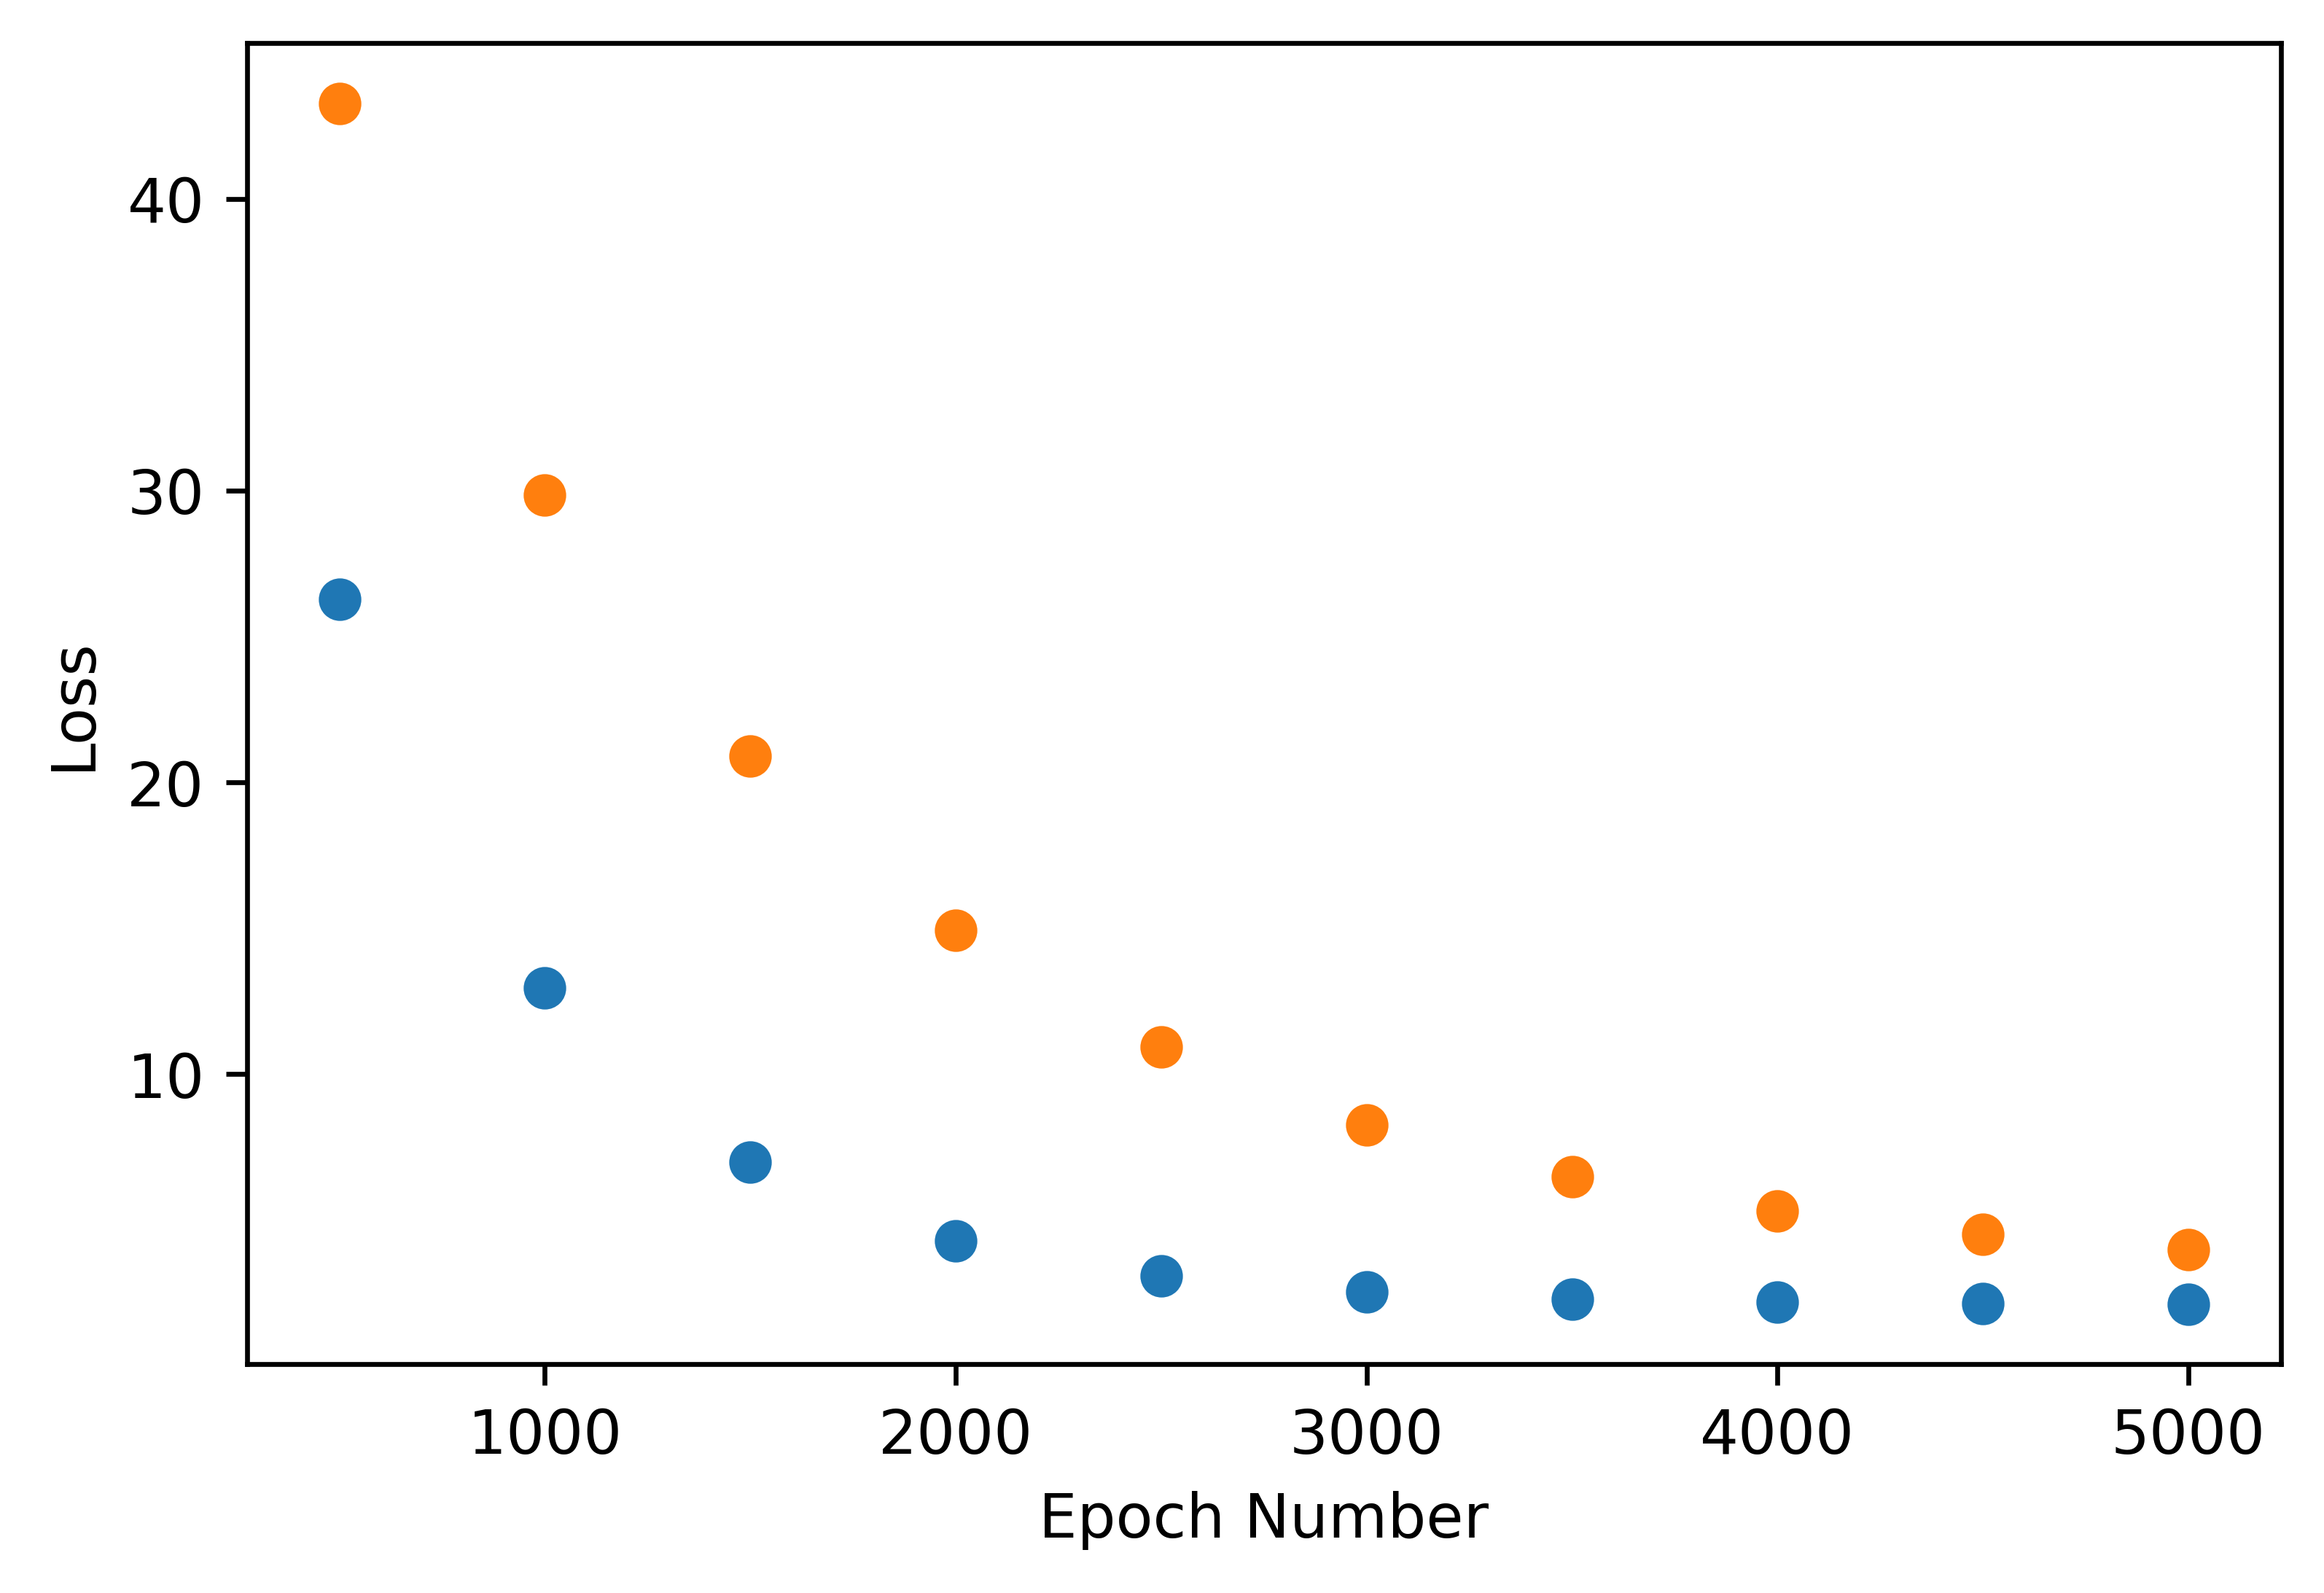

In [9]:
#plot linear model output
fig = plt.figure(dpi=600)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(lossValsnonlin[0], lossValsnonlin[1], 'o')
plt.plot(lossValslin[0], lossValslin[1], 'o')